# Feature Selection - Fischer Score (F Score) and Chi2 Test on Titanic Dataset

## What is Fisher Score and Chi2 ( χ2) Test

Fisher score is one of the most widely used supervised feature selection methods. However, it selects each feature independently according to their scores under the Fisher criterion, which leads to a suboptimal subset of features.

## Chi Square (χ2) Test
A chi-squared test, also written as X2

test, is any statistical hypothesis test where the sampling distribution of the test statistic is a chi-squared distribution.

chi-square test measures dependence between stochastic variables, so using this function weeds out the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score

In [3]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Checking for null values
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# Dropping the columns with null values.
titanic.drop(labels=["age", "deck"], axis=1, inplace=True)

In [6]:
titanic = titanic.dropna()

In [7]:
# NaN and Null are removed
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [8]:
data = titanic[["pclass", "sex", "sibsp", "parch", "embarked", "who", "alone"]].copy()

In [9]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,male,1,0,S,man,False
1,1,female,1,0,C,woman,False
2,3,female,0,0,S,woman,True
3,1,female,1,0,S,woman,False
4,3,male,0,0,S,man,True


In [10]:
data.isnull().sum()

pclass      0
sex         0
sibsp       0
parch       0
embarked    0
who         0
alone       0
dtype: int64

In [11]:
# Convertimg String to Number
sex = {"male": 0, "female": 1}
data["sex"] = data["sex"].map(sex)

In [12]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,S,man,False
1,1,1,1,0,C,woman,False
2,3,1,0,0,S,woman,True
3,1,1,1,0,S,woman,False
4,3,0,0,0,S,man,True


In [13]:
ports = {"S": 0, "C": 1, "Q": 2}
data["embarked"] = data["embarked"].map(ports)

In [14]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,man,False
1,1,1,1,0,1,woman,False
2,3,1,0,0,0,woman,True
3,1,1,1,0,0,woman,False
4,3,0,0,0,0,man,True


In [15]:
who = {"man": 0, "woman": 1, "child": 2}
data["who"] = data["who"].map(who)

In [16]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,0,False
1,1,1,1,0,1,1,False
2,3,1,0,0,0,1,True
3,1,1,1,0,0,1,False
4,3,0,0,0,0,0,True


In [17]:
alone = {False: 0, True: 1}
data["alone"] = data["alone"].map(alone)

In [18]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,0,0
1,1,1,1,0,1,1,0
2,3,1,0,0,0,1,1
3,1,1,1,0,0,1,0
4,3,0,0,0,0,0,1


## F-Test

In [19]:
x = data.copy()
y = titanic["survived"]
x.shape, y.shape

((889, 7), (889,))

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [21]:
f_score = chi2(x_train, y_train)

In [22]:
# Features with values less than 0.05 are more important features
f_score

(array([ 22.65169202, 152.91534343,   0.52934285,  10.35663782,
         16.13255653, 161.42431175,  13.4382363 ]),
 array([1.94189138e-06, 3.99737147e-35, 4.66883271e-01, 1.29009955e-03,
        5.90599986e-05, 5.52664700e-37, 2.46547298e-04]))

In [23]:
p_value = pd.Series(f_score[1], index=x_train.columns)
p_value.sort_values(ascending=True, inplace=True)

In [24]:
# As we can see "who" and "sex" have the lowest p values and hence they are most important features.
p_value

who         5.526647e-37
sex         3.997371e-35
pclass      1.941891e-06
embarked    5.906000e-05
alone       2.465473e-04
parch       1.290100e-03
sibsp       4.668833e-01
dtype: float64

<AxesSubplot:>

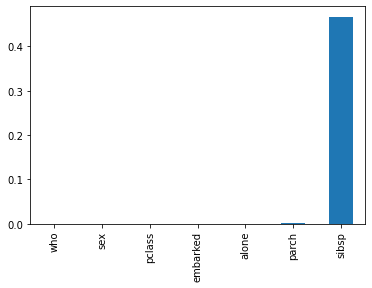

In [25]:
p_value.plot.bar()

In [26]:
x_train_2 = x_train[["who", "sex"]]
x_test_2 = x_test[["who", "sex"]]

## Build Model

In [27]:
def run_random_forest(x_train, x_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("Accuracy on test set: ")
    print(accuracy_score(y_test, y_pred))

In [28]:
%%time
run_random_forest(x_train_2, x_test_2, y_train, y_test)

Accuracy on test set: 
0.7191011235955056
CPU times: user 255 ms, sys: 75.9 ms, total: 331 ms
Wall time: 389 ms


In [29]:
# Adding one more feature "pclass"
x_train_3 = x_train[["who", "sex", "pclass"]]
x_test_3 = x_test[["who", "sex", "pclass"]]

In [30]:
%%time
run_random_forest(x_train_3, x_test_3, y_train, y_test)

Accuracy on test set: 
0.7415730337078652
CPU times: user 266 ms, sys: 81.6 ms, total: 348 ms
Wall time: 399 ms


##### Here we can see the accuracy increased.

In [31]:
# Adding one more feature "embarked"
x_train_4 = x_train[["who", "sex", "pclass", "embarked"]]
x_test_4 = x_test[["who", "sex", "pclass", "embarked"]]

In [32]:
%%time
run_random_forest(x_train_4, x_test_4, y_train, y_test)

Accuracy on test set: 
0.7584269662921348
CPU times: user 271 ms, sys: 82.6 ms, total: 353 ms
Wall time: 392 ms


##### Here we can see the accuracy increased further more.

In [33]:
# Replacing "embarked" with "alone"
x_train_4 = x_train[["who", "sex", "pclass", "alone"]]
x_test_4 = x_test[["who", "sex", "pclass", "alone"]]

In [34]:
%%time
run_random_forest(x_train_4, x_test_4, y_train, y_test)

Accuracy on test set: 
0.7528089887640449
CPU times: user 265 ms, sys: 83.3 ms, total: 349 ms
Wall time: 390 ms


##### Here we can see the accuracy remained unchanged.

In [35]:
# Adding "emabrked" again
x_train_5 = x_train[["who", "sex", "pclass", "alone", "embarked"]]
x_test_5 = x_test[["who", "sex", "pclass", "alone", "embarked"]]

In [36]:
%%time
run_random_forest(x_train_5, x_test_5, y_train, y_test)

Accuracy on test set: 
0.7528089887640449
CPU times: user 277 ms, sys: 85.8 ms, total: 363 ms
Wall time: 388 ms


##### Here we can see the accuracy didn't change much.

In [37]:
%%time
# Testing on original dataset.
run_random_forest(x_train, x_test, y_train, y_test)

Accuracy on test set: 
0.7359550561797753
CPU times: user 284 ms, sys: 82.8 ms, total: 367 ms
Wall time: 388 ms


##### Here we can see the accuracy has decreased.

This shows that a proper feature selection can in some cases improme the accuracy and definetly the training time.